In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [2]:
dfname='telecom_users'
target_name='Churn'
df=pd.read_csv('data/telecom_users_cleaned.csv')#, index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,False,True,True,72,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Credit card (automatic),24.10,1734.65,False
1,9688-YGXVR,Female,False,False,False,44,True,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,True,Credit card (automatic),88.15,3973.20,False
2,9286-DOJGF,Female,True,True,False,38,True,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Bank transfer (automatic),74.95,2869.85,True
3,6994-KERXL,Male,False,False,False,4,True,No,DSL,No,...,No,No,No,Yes,Month-to-month,True,Electronic check,55.90,238.50,False
4,2181-UAESM,Male,False,False,False,2,True,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,False,Electronic check,53.45,119.50,False


In [3]:
df.tail(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5985,4795-UXVCJ,Male,False,False,False,26,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.8,457.3,False


In [4]:
df_shape=df.shape
print('Shape of the',dfname,'DataFrame :', df_shape)

Shape of the telecom_users DataFrame : (5986, 21)


In [5]:
df.drop_duplicates(inplace=True)
drop_duplicates=df_shape[0]-df.shape[0]
print(drop_duplicates, 'row(s) are dropped')

0 row(s) are dropped


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   bool   
 3   Partner           5986 non-null   bool   
 4   Dependents        5986 non-null   bool   
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   bool   
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   bool   


In [7]:
df_columns=df.columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
## Create a dataframe with continuous columns 
df_cont = df.select_dtypes(include = ['int64','float64'])
col_cont=df_cont.columns
## Create a dataframe with categorical columns 
df_cat = df.select_dtypes(include =['object'])
col_cat=df_cat.columns
print('Continuous columns are:', col_cont.values )
print('Cartegorical columns are:', col_cat.values)


Continuous columns are: ['tenure' 'MonthlyCharges' 'TotalCharges']
Cartegorical columns are: ['customerID' 'gender' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaymentMethod']


In [9]:
df["TotalCharges"]= pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
## Create a dataframe with continuous columns 
df_cont = df.select_dtypes(include = ['int64','float64'])
col_cont=df_cont.columns
## Create a dataframe with categorical columns 
df_cat = df.select_dtypes(include =['object'])
col_cat=df_cat.columns
print('Continuous columns are:', col_cont.values )
print('Cartegorical columns are:', col_cat.values)

Continuous columns are: ['tenure' 'MonthlyCharges' 'TotalCharges']
Cartegorical columns are: ['customerID' 'gender' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaymentMethod']


In [11]:
df['Partner'].replace({'no': 0, 'yes': 1}, inplace=True)


In [12]:
# hard-coded
for col in ['Partner','Dependents', 'PhoneService','PaperlessBilling' ,'Churn']:
    df[col]=df[col].replace(to_replace=['no', 'yes'], value=[0, 1])
    
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,False,True,True,72,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Credit card (automatic),24.10,1734.65,False
1,9688-YGXVR,Female,False,False,False,44,True,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,True,Credit card (automatic),88.15,3973.20,False
2,9286-DOJGF,Female,True,True,False,38,True,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Bank transfer (automatic),74.95,2869.85,True
3,6994-KERXL,Male,False,False,False,4,True,No,DSL,No,...,No,No,No,Yes,Month-to-month,True,Electronic check,55.90,238.50,False
4,2181-UAESM,Male,False,False,False,2,True,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,False,Electronic check,53.45,119.50,False


In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5976.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2274.127165
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,404.312500
50%,29.000000,70.400000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


In [14]:
# How much unique values per column?
print('Numbers of unique values in each column by', df.shape[0],'numbers of rows: \n', df.nunique())

Numbers of unique values in each column by 5986 numbers of rows: 
 customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5610
Churn                  2
dtype: int64


                  Total  Percent
customerID            0      0.0
gender                0      0.0
MultipleLines         0      0.0
InternetService       0      0.0
OnlineSecurity        0      0.0
OnlineBackup          0      0.0
DeviceProtection      0      0.0
TechSupport           0      0.0
StreamingTV           0      0.0
StreamingMovies       0      0.0
Contract              0      0.0
PaymentMethod         0      0.0 



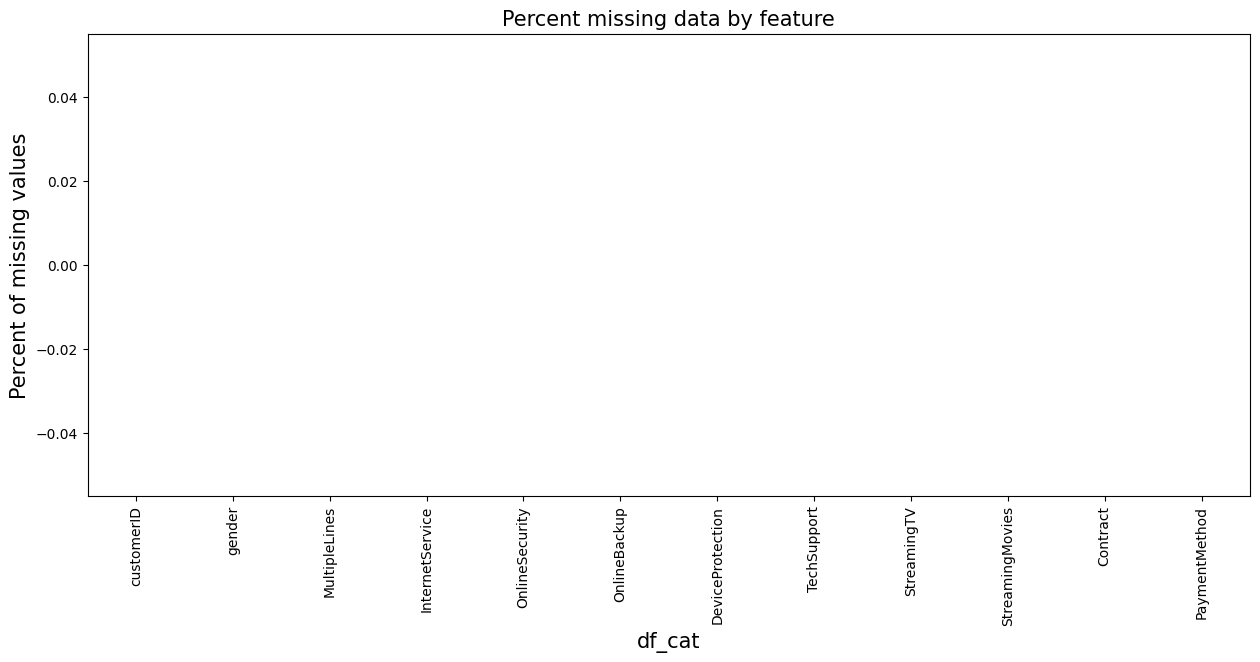

In [15]:
# Percentage of missing values in categorical data along with visualization 
if sum(df.dtypes==object)==0:
    print('df_cat ist empty')
else:
    total = df_cat.isnull().sum().sort_values(ascending=False)
    percent = df_cat.isnull().sum()/df_cat.isnull().count().sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation=90)
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('df_cat', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    print(missing_data,'\n')
    missing_data

                Total   Percent
TotalCharges       10  0.001671
tenure              0  0.000000
MonthlyCharges      0  0.000000 

Columns with more the 5% missing values:
 Index([], dtype='object')


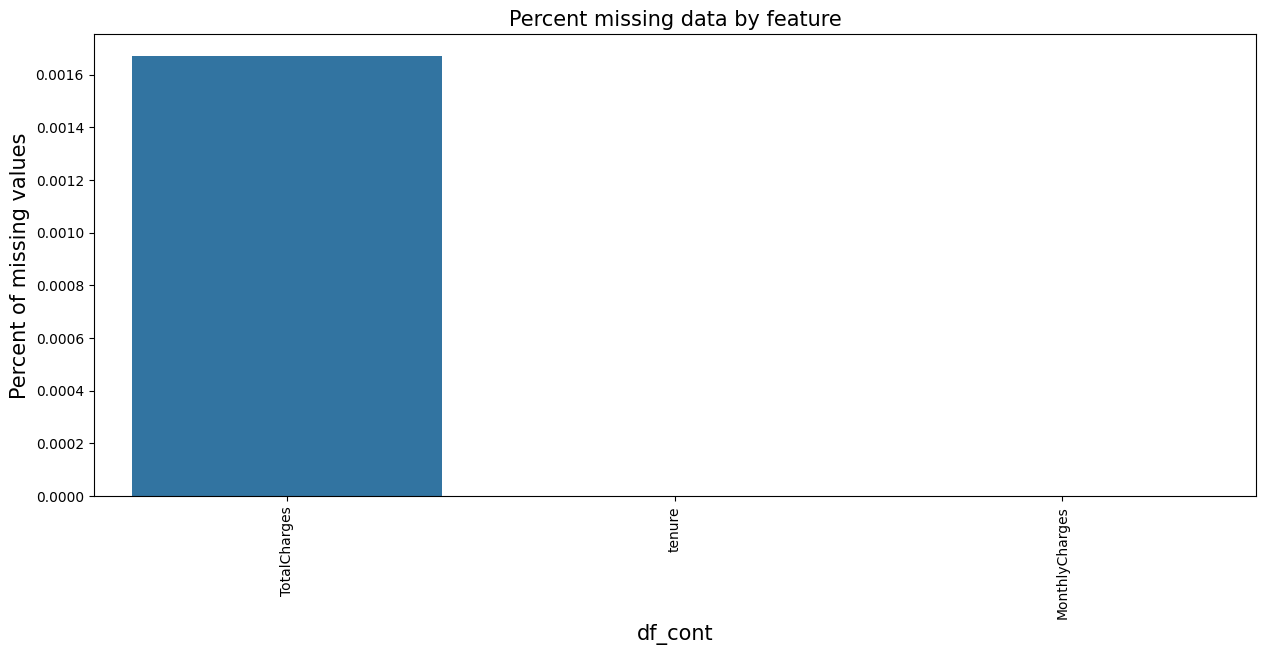

In [16]:
# Percentage of missing values in continuous columns along with visualization
total = df_cont.isnull().sum().sort_values(ascending=False)
percent = df_cont.isnull().sum()/df_cont.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
print(missing_data,'\n')
miss5_col=missing_data.index[missing_data['Percent']>0.05]
print('Columns with more the 5% missing values:\n', miss5_col)

In [17]:
# Drop Features e.g. to prevent data leagake

#

act=input('Are the any Features which may cause data lekage? Do you want to drop columns?(y/n)')
if act== 'y':
    cols=input('Enter the name(s) of the column(s) as list')    
    df.drop(columns=cols, inplace=True)
    
    # Update continuous and categorical columns
    ## Create a dataframe with continuous columns 
    df_cont = df.select_dtypes(include = ['int64','float64'])
    col_cont=df_cont.columns
    ## Create a dataframe with categorical columns 
    df_cat = df.select_dtypes(include =['object'])
    col_cat=df_cat.columns
    df.head(2)

Are the any Features which may cause data lekage? Do you want to drop columns?(y/n) n


<Axes: >

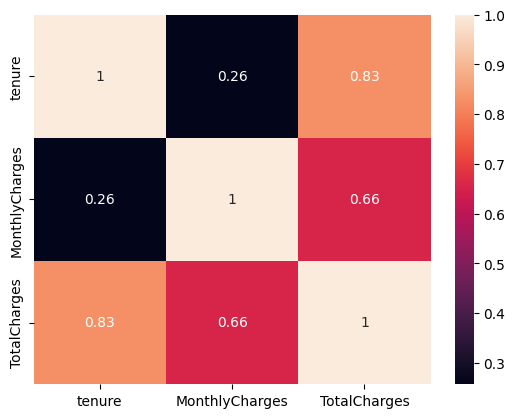

In [18]:
#correlation heatmap
sns.heatmap(df_cont.corr(),annot=True)

<Axes: >

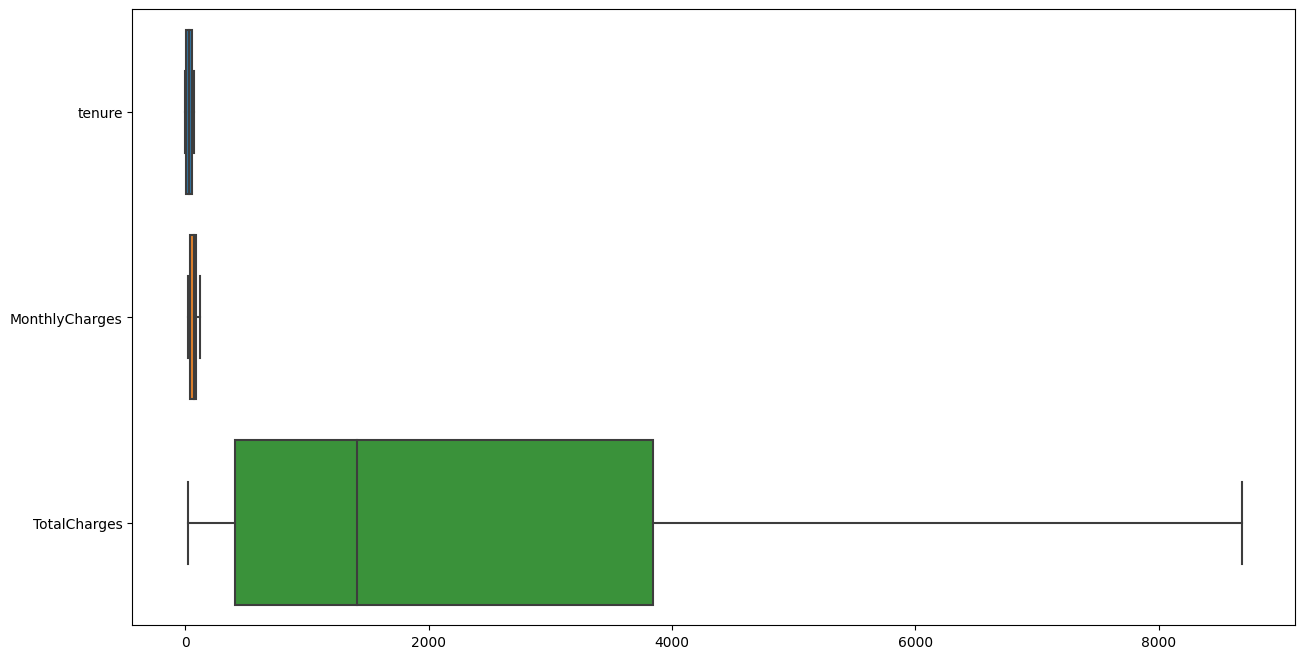

In [19]:
# Boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cont,orient="h")

In [20]:
# df[target_name].value_counts()

In [21]:
# df_cont['tenure']

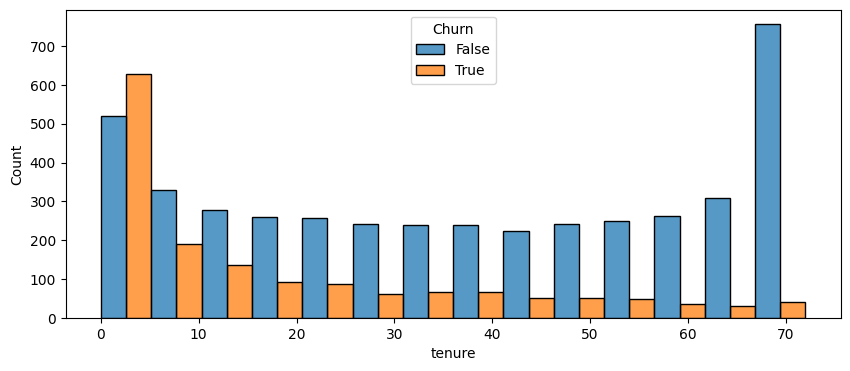

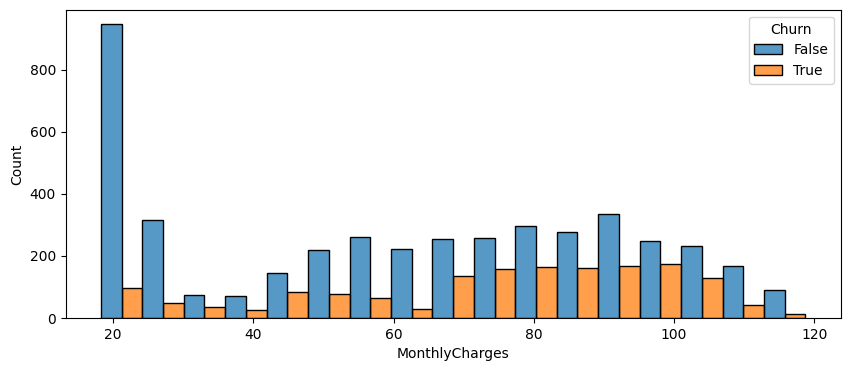

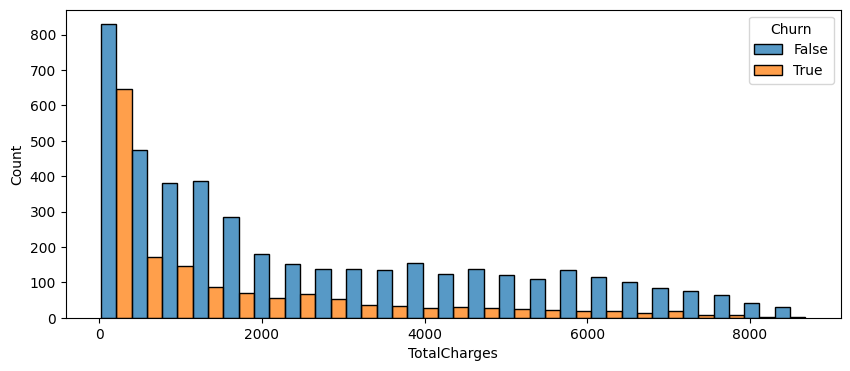

In [22]:
for col in col_cont:
    plt.figure(figsize=(10,4))
    sns.histplot(x=df_cont[col],hue=df[target_name],multiple="dodge")

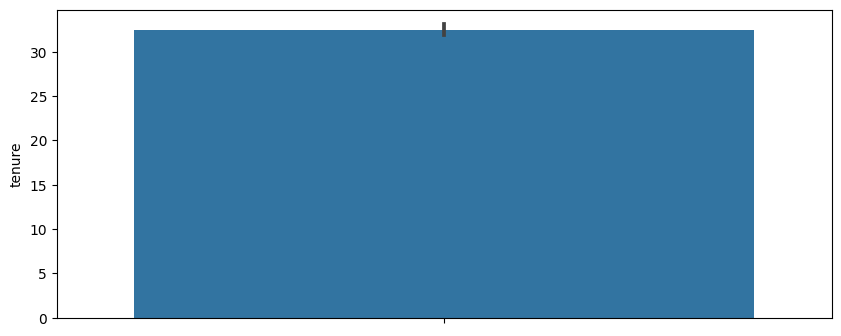

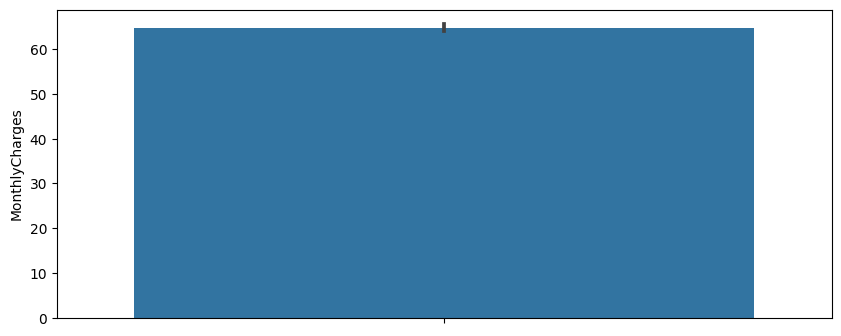

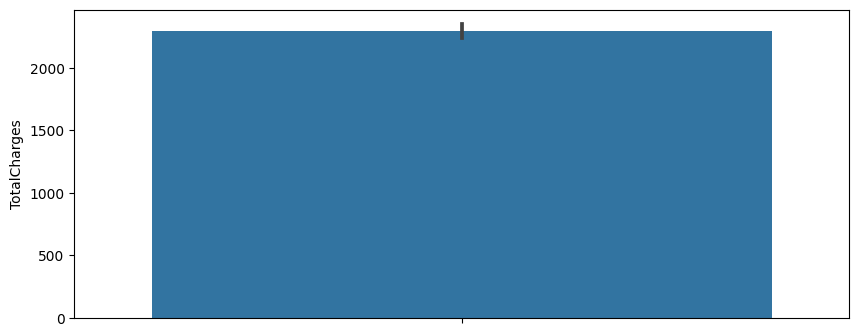

In [23]:
#histplots of the features
#plt.figure(figsize=(15,8))

for col in col_cont:
    plt.figure(figsize=(10,4))
    sns.barplot(y=df_cont[col],hue=df[target_name])

In [24]:
#df.isnull().sum()

In [25]:
#histplots of the features
#plt.figure(figsize=(15,8))

# for col in col_cat:
#    plt.figure(figsize=(10,4))
#    sns.histplot(data=df['Churn'],hue=df_cat[col])

In [26]:
#df['Churn']

In [27]:
#df.isnull().sum()

In [28]:
#df.dropna(inplace=True)

In [29]:
from sklearn.model_selection import train_test_split


X_train_, X_test_, y_train, y_test = train_test_split(df.drop(columns='Churn'), # X
                                                    df['Churn'], # y
                                                    test_size=0.2, # %age of test split
                                                    random_state=17) # ensure reproducibility


In [30]:
categorical_features = X_train_.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train_.select_dtypes(include=['float64', 'int64']).columns.tolist()
boolean_features = [col for col in X_train_.columns if col not in categorical_features + numerical_features]

In [54]:
# Build a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])  

# build a ColumnTransformer
data_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass', 'passthrough', boolean_features)
    ])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [46]:
X_scaled=data_transformer.fit_transform(df)

In [ ]:
# X_scaled.savez()

In [48]:
from pycaret.classification import *

clf = setup(data=pd.concat(X_scaled, axis=1),
            target = 'price',
            session_id=13,
            max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.008, # Categories with less than 0.008 (0.8%) of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='swiss1',
            n_jobs=-1)

TypeError: cannot concatenate object of type '<class 'scipy.sparse._csr.csr_matrix'>'; only Series and DataFrame objs are valid

In [ ]:
# apply preprocessing
X_train = data_transformer.fit_transform(X_train_)
X_test = data_transformer.transform(X_test_)

# y we don't need to transform

In [ ]:
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print()
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)
# print('Test features shape:', X_test.shape)

In [ ]:
X_train[0]

In [ ]:
#Elbow methods

cluster_errors = []

for n_clusters in range(2, 15):
    kmeans_pipeline = Pipeline([
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(X_train)
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

In [ ]:
plt.plot(range(2, 15), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

silhouette_s = []

for n_clusters in range(2, 11):
    agglo_pipeline = Pipeline([
    ("cluster", AgglomerativeClustering(n_clusters=n_clusters))])

    cluster_labels = agglo_pipeline.fit_predict(X_train)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(X_train, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(X_train, cluster_labels))

plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
X=X_train

''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.
          And so you do not have to spend time trying to understand the code'''

range_n_clusters = range(2, 15)


r_seed = 17

cols = df.drop(columns=['Churn']).columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X[:, 0],
                X[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

In [ ]:
X_train

In [ ]:
kmeans_pipeline = Pipeline([
        ("cluster", KMeans(n_clusters=3, random_state=17, verbose=0))])

# kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.fit_predict(X_train)
X_train_['IoTDevice'] = clusters
X_train_.head()

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=X_train_['tenure'], x=X_train_['MonthlyCharges'], hue=X_train_['IoTDevice']);

## PCA

In [ ]:
cor_mat1 = np.corrcoef(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors: \n', eig_vecs)
print('\nEigenvalues: \n', eig_vals)

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
#with plt.style.context('seaborn-whitegrid'):
plt.figure(figsize=(12, 4))

plt.bar(range(20), var_exp[:20], alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(20), cum_var_exp[:20], where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_train)

In [ ]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                   ('blue', 'red', 'green')):
    plt.scatter(Y_sklearn[y==lab, 0],
                Y_sklearn[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()